# Introduction to Brightway25

<details open>

<summary>Read me first...</summary>

```{admonition} Authors
:class: hint
This notebook was authored by [Alya Bolowich](https://github.com/alyabolowich) and [Michael Weinold](https://github.com/michaelweinold) with help from [Sabina Bednářová](https://www.linkedin.com/in/sabina-bednářová-ab06a6232/) based on earlier work by [Max Koslowski](https://github.com/maximikos). It was edited for publication by [Michael Weinold](https://github.com/michaelweinold) with the help of [Maria Höller](https://www.linkedin.com/in/maria-hoeller/) and [Mehdi Iguider](https://www.linkedin.com/in/mehdi-iguider/) as part of the [Brightcon 2024 Documentation Hackathon](https://2024.brightcon.link).
```

```{admonition} In order to complete this tutorial successfully, you will need:
:class: important
1. Basic knowledge of the Conda package manager ([manage environments & install packages](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)).
2. A working [installation of Brightway](https://docs.brightway.dev/en/latest/content/installation/index.html).
3. Basic knowledge of [Python data types](https://docs.python.org/3/library/datatypes.html).
4. Basic understanding of matrix-based LCA data and calculations.
```

```{admonition} How to use this Tutorial...
:class: note
1. You could read it online on this website and copy/paste some snippets of code into a Jupyter Notebook to play around.
2. If you click on the download button in the top right corner, you can download this section as a Jupyter Notebook (`.ipynb`).
```

```{admonition} Cheat Sheet
:class: note
You can always look for important commands in [the cheat sheet of the main documentation site](https://docs.brightway.dev/en/latest/content/cheatsheet/index.html).
```

</details>

## Introductory Note

This is a [Jupyter Notebook](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html) with the purpose of making you familiar with the basic Python-based [Brightway25 LCA framework](https://documentation.brightway.dev/en/latest/index.html) and its various functionalities, all developed by Chris Mutel and colleagues.

This notebook is designed to get you started with creating your own project, setting up your database(s) (used as background systems) and simple foreground systems, performing your first impact assessments, analysing your results, and running Monte Carlo simulations in calculation setups.

Since Brightway2 builds on Python, a widely used programming language for scientific analysis, and can be installed easiest through the package and environment mangement system [*conda*](https://docs.conda.io/projects/conda/en/latest/), we need to get either [Anaconda](https://www.anaconda.com/), an open source distribution for multiple languages including Python and R, or at least [Miniconda](https://docs.conda.io/en/latest/miniconda.html), the bootstrap version of Anaconda. The full Anaconda installation contains, among others, a terminal and an IDE (integrated development environment). And, good for us, it natively installs the setup for Jupyter Notebooks, through which we can work most effectively with Brightway2. Both Jupyter and Brightway can also be installed through [*pip*](https://jupyter.readthedocs.io/en/latest/install.html#new-to-python-and-jupyter), but it may be a tad trickier.

For clarification: *conda* is, just like *pip*, a package and environment management system; the difference, however, is that "*pip* installs python packages within any environment; *conda* installs any package within conda environments." (quote from [here](https://jakevdp.github.io/blog/2016/08/25/conda-myths-and-misconceptions/))

**Recommended prerequisites are:**
* having installed [Brightway25](https://docs.brightway.dev/en/latest/content/installation/index.html) + all relevant packages (make sure to do so in the correct virtual environment) and possibly even having had a first quick look at its [documentation](https://docs.brightway.dev/en/latest/index.html).
  <ins>
* knowledge of the foundations of life cycle assessment. If you don't have this knowledge (or simply need a refresher), have a look at the [online teaching resources](http://www.teaching.industrialecology.uni-freiburg.de/) provided by the Industrial Ecology Freiburg Group, led by Stefan Pauliuk.
* familiarity with any programming language - no Python-specific requirements, as most methods are quite intuitive and will be explained anyway. In case you are a total beginner, check [this](https://github.com/PoutineAndRosti/Brightway-Seminar-2017/blob/master/Day%201%20AM/1%20-%20Python%20and%20notebook%20basics.ipynb) out :)

**For Jupyter newbies**

In a [Jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/index.html) everything is live and interactive. And, perhaps more interesting, markdown elements and actual code are mixed - and you can even include images, videos, and other formats. There are [many](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks), [many](https://rise.readthedocs.io/en/maint-5.5/index.html) things that you can do with such notebooks, and there are also many [cool](https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/) [tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/) as well as some [extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions).

To get you started, you might want to press the `h`-key, which gives you an overview of keyboard shortcuts. Then, you have markdown (richt text containing) cells and code cells: if you hover over and select any cell by clicking on it (notice the blue bar on the left of the cell; turns green when you are in edit mode, i.e. having clicked into the cell box) you can turn it into either a markdown one by pressing `m` or into a code cell by pressing `y`; there are other types, too, but they are not relevant for what we want to do. Click on a cell to select it or simply use the arrow keys to navigate. If you want to run a cell, simply press `shift+enter`. And if you want to insert an empty cell above or below the current one, simply press `a` or `b`. For changing the contents of a cell, either doubleclick a markdown cell or click a code cell; pressing `enter` works, too. You can exit a cell using `Esc` and can copy, cut, and paste cells when pressing the keys `c`, `x`, and `v` when having selected a cell. As for the output of a command, note that clicking on it once makes it scroll-able, clicking on it twice results in hiding it.

You will notice further below that there are sometimes commands starting with `import`. These ones are needed to "import" the code of the respective package into the present code. For instance, by importing the Brightway2 package you enable the present notebook to use the Brightway2 functionalities. To have access to these packages, you need to download them first; otherwise you will receive an error message. You can download such packages in two ways: either in the notebook or in the terminal (make sure to be in the right virtual environment).

These are the absolute basics, but they are already more than what you need here.

**Recap on LCA**

To make sure we are on the same page, let's recapitulate the basics of LCA, expressed in a single formula (the notation may differ to the one that you are familiar with):

$$h = CBA^{-1}f$$

where: 

| Variable | Name ([Heijungs & Suh 2001](https://doi.org/10.1007/978-94-015-9900-9)) | Brightway name | Dimensions | Mnemonic | Units of elements (example) | Brightway variable |
| --- | --- | --- | --- | --- | --- | --- 
| A | Technology matrix | Technosphere | p × p | **A**ctivities | kg coal per kWh electricity from coal power plant | lca.technosphere_matrix 
| B | Intervention matrix | Biosphere | q × p | **B**iosphere | kg CO2 directly emitted per kWh from coal power plant | lca.biosphere_matrix
| C | Characterization matrix | Methods | r × q | **C**haracterization | kg CO2 eq. per kg CH4 | lca.inventory |
| Λ | Intensity matrix | | | | kg CO2 per kWh electricity from coal power plant, lifecycle | lca.demand_array |
| f | Final demand vector | Functional unit | p × 1 | | kWh electricity from coal power plant per final demand  |
| g | Inventory vector | | q × 1 | | kg CO2 per final demand |
| h | Impact vector | Scores | r × 1| | kg CO2 eq. per final demand |
| s | Scaling vector | Supply array | p × 1 | | kg coal per final demand | lca.supply_array |

Note that the technosphere matrix (commonly referred to as the "A matrix") must be square and invertible. 

Specific parts of the above formula have distinct names. Since these names are also used in the Brightway2-framework, we will note them down here:
- $f$... demand array
- $A{^-1}f$... supply array
- $BA{^-1}f$... inventory
- $CBA{^-1}f$... characterised inventory

To not only get a single score per impact category, we can diagonalise the supply array (how this can be realised in the Brightway25 framework is not shown in this notebook) so that we can see the environmental impacts per process:

$$h_{process} = CB~diag(A^{-1}f)$$

You can do the same for breaking down the total environmental impact to the stressors:

$$h_{stressor} = C~diag(BA^{-1}f)$$

Another way of representing your results is to show the environmental stressors per activity for a specific impact category:

$$h_{category} = diag(C)~B~diag(A^{-1}f)$$


**What's the difference between Brightway2 and Brightway25?**

For those who have used Brightway2, you may remember that data gets written to disk. With Brightway25, the goal is to migrate towards datapackages. This would allow you to store the data as a datapackage and later use the Python package bw2calc to run the data. Since Brightway25 is still in beta mode, this feature (and subsequent tutorials to do so) have not been fully implemented yet. One way to look at the difference is Brightway2 is more structure-centric, whereas Brightway25 is more data-centric. 

For now, this BW25 tutorial has added additional information/explanations from Max's original BW2 tutorial, but will not go into the datapackages in BW25. If you want to know more about that, check out Chris Mutel's tutorial ["from-the-ground-up"](https://github.com/brightway-lca/from-the-ground-up/blob/main/2%20-%20Building%20and%20using%20matrices%20in%20bw2calc.ipynb). Stay tuned for tutorials that will show you how to use Brightway25 to the fullest extent as new features get released! 

```{admonition} Warning
:class: warning
Brightway25 is still under development and new releases may induce breaking changes! If you prefer a stable version (meaning, it will be the same tomorrow as it is today), you can check out the [Introduction to Brightway2 section in this book](../BW2/BW2_introduction.ipynb).
```

**Outcomes - what are we going to learn?**

By completing this notebook (run it locally on your machine and don't just read the code), we will:
- have understood the basics of the Brightway25 LCA framework
- know how to import/generate/handle datasets in Brightway25
- be able to run simple LCAs (both linearly and in parallel)
- be able to analyse a product system and the results of an LCA
- know the contribution analysis of a product
- be able to visualise data in form of tables and figures

What will come in the future?
- tutorial on datapackages and using parameters (parameters are addressed in Max's BW2 tutorial)
- tutorial with better detail for visualizing contribution analyses

Just for clarification, abbreviations used in the markdown cells of this notebook are:

| Abbreviation(s) | Written out |
| --- | --- |
| bw, BW25 | Brightway25 |
| FU | Functional unit |
| LCA | Life cycle assessment |
| LCI | Life cycle inventory |
| LCIA | Life cycle impact assessment |
| EI| Ecoinvent |
| db| database |

If you're super keen then you might also be interested in checking out the **[Activity Browser](https://github.com/LCA-ActivityBrowser/activity-browser)** which is a graphical user interface for Brightway2 (currently being updated with Brightway25). 

<a id='section1'></a>
## 1. Setup of a Project

We first import all relevant Python packages. You can download the Conda environment including these packages here: {download}`env_bw25.yml <https://github.com/brightway-lca/brightway-book/raw/refs/heads/main/content/chapters/BW25/_environment/env_bw25.yml>` and install it using the command:

```bash
conda env create -f env_bw25.yml --solver libmamba
```

In [2]:
import bw2data as bd
import bw2io as bi
import bw2calc as bc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let's check the versions of Brightway25 packages that we are using. This can be useful to know if you are experiencing any issues with the code.

In [3]:
print("bw2data version", bd.__version__)
print("bw2io version", bi.__version__)
print("bw2calc version", bi.__version__)

bw2data version (4, 0, 'dev56')
bw2io version 0.9.DEV38
bw2calc version 0.9.DEV38


Let's list the available projects. Of course, on your computer, you will see a different list of projects. For instance, if you're just starting out, you should only see the project `default`.

In [10]:
bd.projects

Brightway2 projects manager with 8 objects:
	USEEIO-1.1
	banana
	bw_panel
	ddd
	debug
	default
	ei_3.10
	learn_brightway_bw2
Use `projects.report()` to get a report on all projects.

We can see where our projects are stored. Not essential to run your LCA, but good to know.

In [5]:
bd.projects.dir

PosixPath('/Users/michaelweinold/Library/Application Support/Brightway3/default.c21f969b')

<a id='section11'></a>
### 1.1 Instantiating your Project

If you're starting a new project, give it a name. Else, add the name of an existing project you want to continue working on.

```{admonition} Warning
:class: warning
Whether you want to create a new project or work with an existing one, the following line of code will be the same. You **must** execute the `bd.projects.set_current()` command **_before_** any further processing!
```

In [5]:
bd.projects.set_current("bw25-tuto")

We can confirm that the new project has been set:

In [13]:
bd.projects

Brightway2 projects manager with 9 objects:
	USEEIO-1.1
	banana
	bw25-tuto
	bw_panel
	ddd
	debug
	default
	ei_3.10
	learn_brightway_bw2
Use `projects.report()` to get a report on all projects.

<a id='section2'></a>
## 2. Database Import/Setup

We have just created an empty project. As you can see, it does not yet contain any databases:

In [10]:
# If this is your first time using this BW25 project, this should be an empty dictionary!
bd.databases

Databases dictionary with 0 objects

LCA draws on a lot of background data. Those can be found in numerous databases, one of which being ecoinvent. Let's import it now! There are now two ways to import the Ecoinvent database. You can choose either option A or option B, but you don't have to execute both!

### Option A

This option imports the biosphere, LCIA methods, and ecoinvent all in one go!

```{admonition} Change Placeholder Text!
:class: note
Below, change the placeholder text `JohnDoe` to your own Ecoinvent username and the password `1234` to your own Ecoinvent password.
```

In [12]:
if 'ecoinvent-3.9.1-cutoff' in bd.databases:
    print('ecoinvent 3.9.1 is already present in the project')
else:
    bi.import_ecoinvent_release(
        version='3.9.1',
        system_model='cutoff', # can be cutoff / apos / consequential / EN15804
        username='JohnDoe',
        password='1234'
    )

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: ensure_categories_are_tuples
Applied 3 strategies in 0.00 seconds
4718 datasets
	0 exchanges
	Links to the following databases:

	0 unlinked exchanges (0 types)
		


100%|██████████| 4718/4718 [00:00<00:00, 46251.23it/s]

Vacuuming database 


Created database: ecoinvent-3.9.1-biosphere
Extracting XML data from 21238 datasets
Extracted 21238 datasets in 17.55 seconds
Applying strategy: normalize_units
Applying strategy: update_ecoinvent_locations
Applying strategy: remove_zero_amount_coproducts
Applying strategy: remove_zero_amount_inputs_with_no_activity
Applying strategy: remove_unnamed_parameters
Applying strategy: es2_assign_only_product_with_amount_as_reference_product
Applying strategy: assign_single_product_as_activity
Applying strategy: create_composite_code
Applying strategy: drop_unspecified_subcategories
Applying strategy: fix_ecoinvent_flows_pre35
Applying strategy: drop_temporary_outdated_biosphere_flows
Applying strategy: link_biosphere_by_flow_uuid
Applying strategy: link_internal_technosphere_by_composite_code
Applying strategy: delete_exchanges_missing_activity
Applying strategy: delete_ghost_exchanges
Applying strategy: remove_uncertainty_from_negative_loss_exchanges
Applying strategy: fix_unreasonably_high

100%|██████████| 21238/21238 [00:24<00:00, 883.71it/s] 


Vacuuming database 
Created database: ecoinvent-3.9.1-cutoff


Let's check if the databases are now there...


In [13]:
list(bd.databases)

['ecoinvent-3.9.1-biosphere', 'ecoinvent-3.9.1-cutoff']

### Option B

In most older notebooks you will find on the web, you will still see the _old_ way of importing all these. There, we first import the biosphere and LCIA methods:

In [14]:
if any("biosphere" in db for db in bd.databases):
    print('Biosphere is already present in the project.')
else:
    bi.bw2setup()

Biosphere is already present in the project.


Only now, we import the Ecoinvent data. First, download the Ecoinvent data from the [Ecoinvent website](https://ecoquery.ecoinvent.org/3.10/cutoff/files) and unzip the file. Then, provide the path to the unzipped folder `datasets` in the code below:

In [15]:
if 'ecoinvent-3.9.1-cutoff' in bd.databases:
    print('Ecoinvent 3.9.1 is already present in the project.')
else:
    ei = bi.SingleOutputEcospold2Importer(dirpath=r'C:\Users\johndoe\Downloads\ecoinvent\ecoinvent 3.9.1_cutoff_ecoSpold02\datasets', db_name='ev391cutoff') #recommendation for consistent databases naming: database name (ecoinvent), version number, system model
    ei.apply_strategies() #fixing some issues when ecoinvent and brightway have to talk together by going through all datasets and manipulating them in a specific way
    ei.statistics() #checking if everything worked out with strategies and linking
    ei.write_database() #save the database to our hard drive

Ecoinvent 3.9.1 is already present in the project.


What does it mean to "apply strategies"? Strategies are processes that will convert the database into something that Brightway can use. You do not need to deal with these yourself, however, you may find that the program fails because of unlinked exchanges. This is typically not a problem when importing ecoinvent, but may come up when you import your foreground (we'll get to that).

Again, we can check that our database was correctly imported:

In [11]:
bd.databases

Databases dictionary with 0 objects

```{admonition} Warning
:class: warning
In this example, we will use data from Ecoinvent. In case you do not have access to it, do not worry - you can complete almost the whole notebook with the free FORWAST database, too. You would only have to change the database selection in each respective cell from 'eidb.' to 'fw.'(abbreviations taken from below). Mind that you would also have to undertake manual changes in the Excel spreadsheet for making the respective import work. Also, mind that the FORWAST data differs to the one of ecoinvent; this, however, affects only few of your commands further below (e.g. finding activities by name etc.). If you want to work with data from other sources, e.g. Agribalyse, please see the respective strategies for their data import.
```

<a id='section23'></a>
### 2.3 Database Selection and Activities

If our database of choice is already included, then we just make use of it directly. For convenience, we need to assign a variable to it so that the database can be worked with more easily.

In [6]:
eidb = bd.Database("ecoinvent-3.9.1-cutoff")
eidb

Brightway2 SQLiteBackend: ecoinvent-3.9.1-cutoff

We can also check up on the type and length of our imported database.

In [5]:
print(
    "The imported ecoinvent database is of type {} and has a length of {}.".format(
        type(eidb), len(eidb)
    )
)

The imported ecoinvent database is of type <class 'bw2data.backends.base.SQLiteBackend'> and has a length of 21238.


And we can even visualise our technospheres. Be patient, this can take a couple seconds ⏳

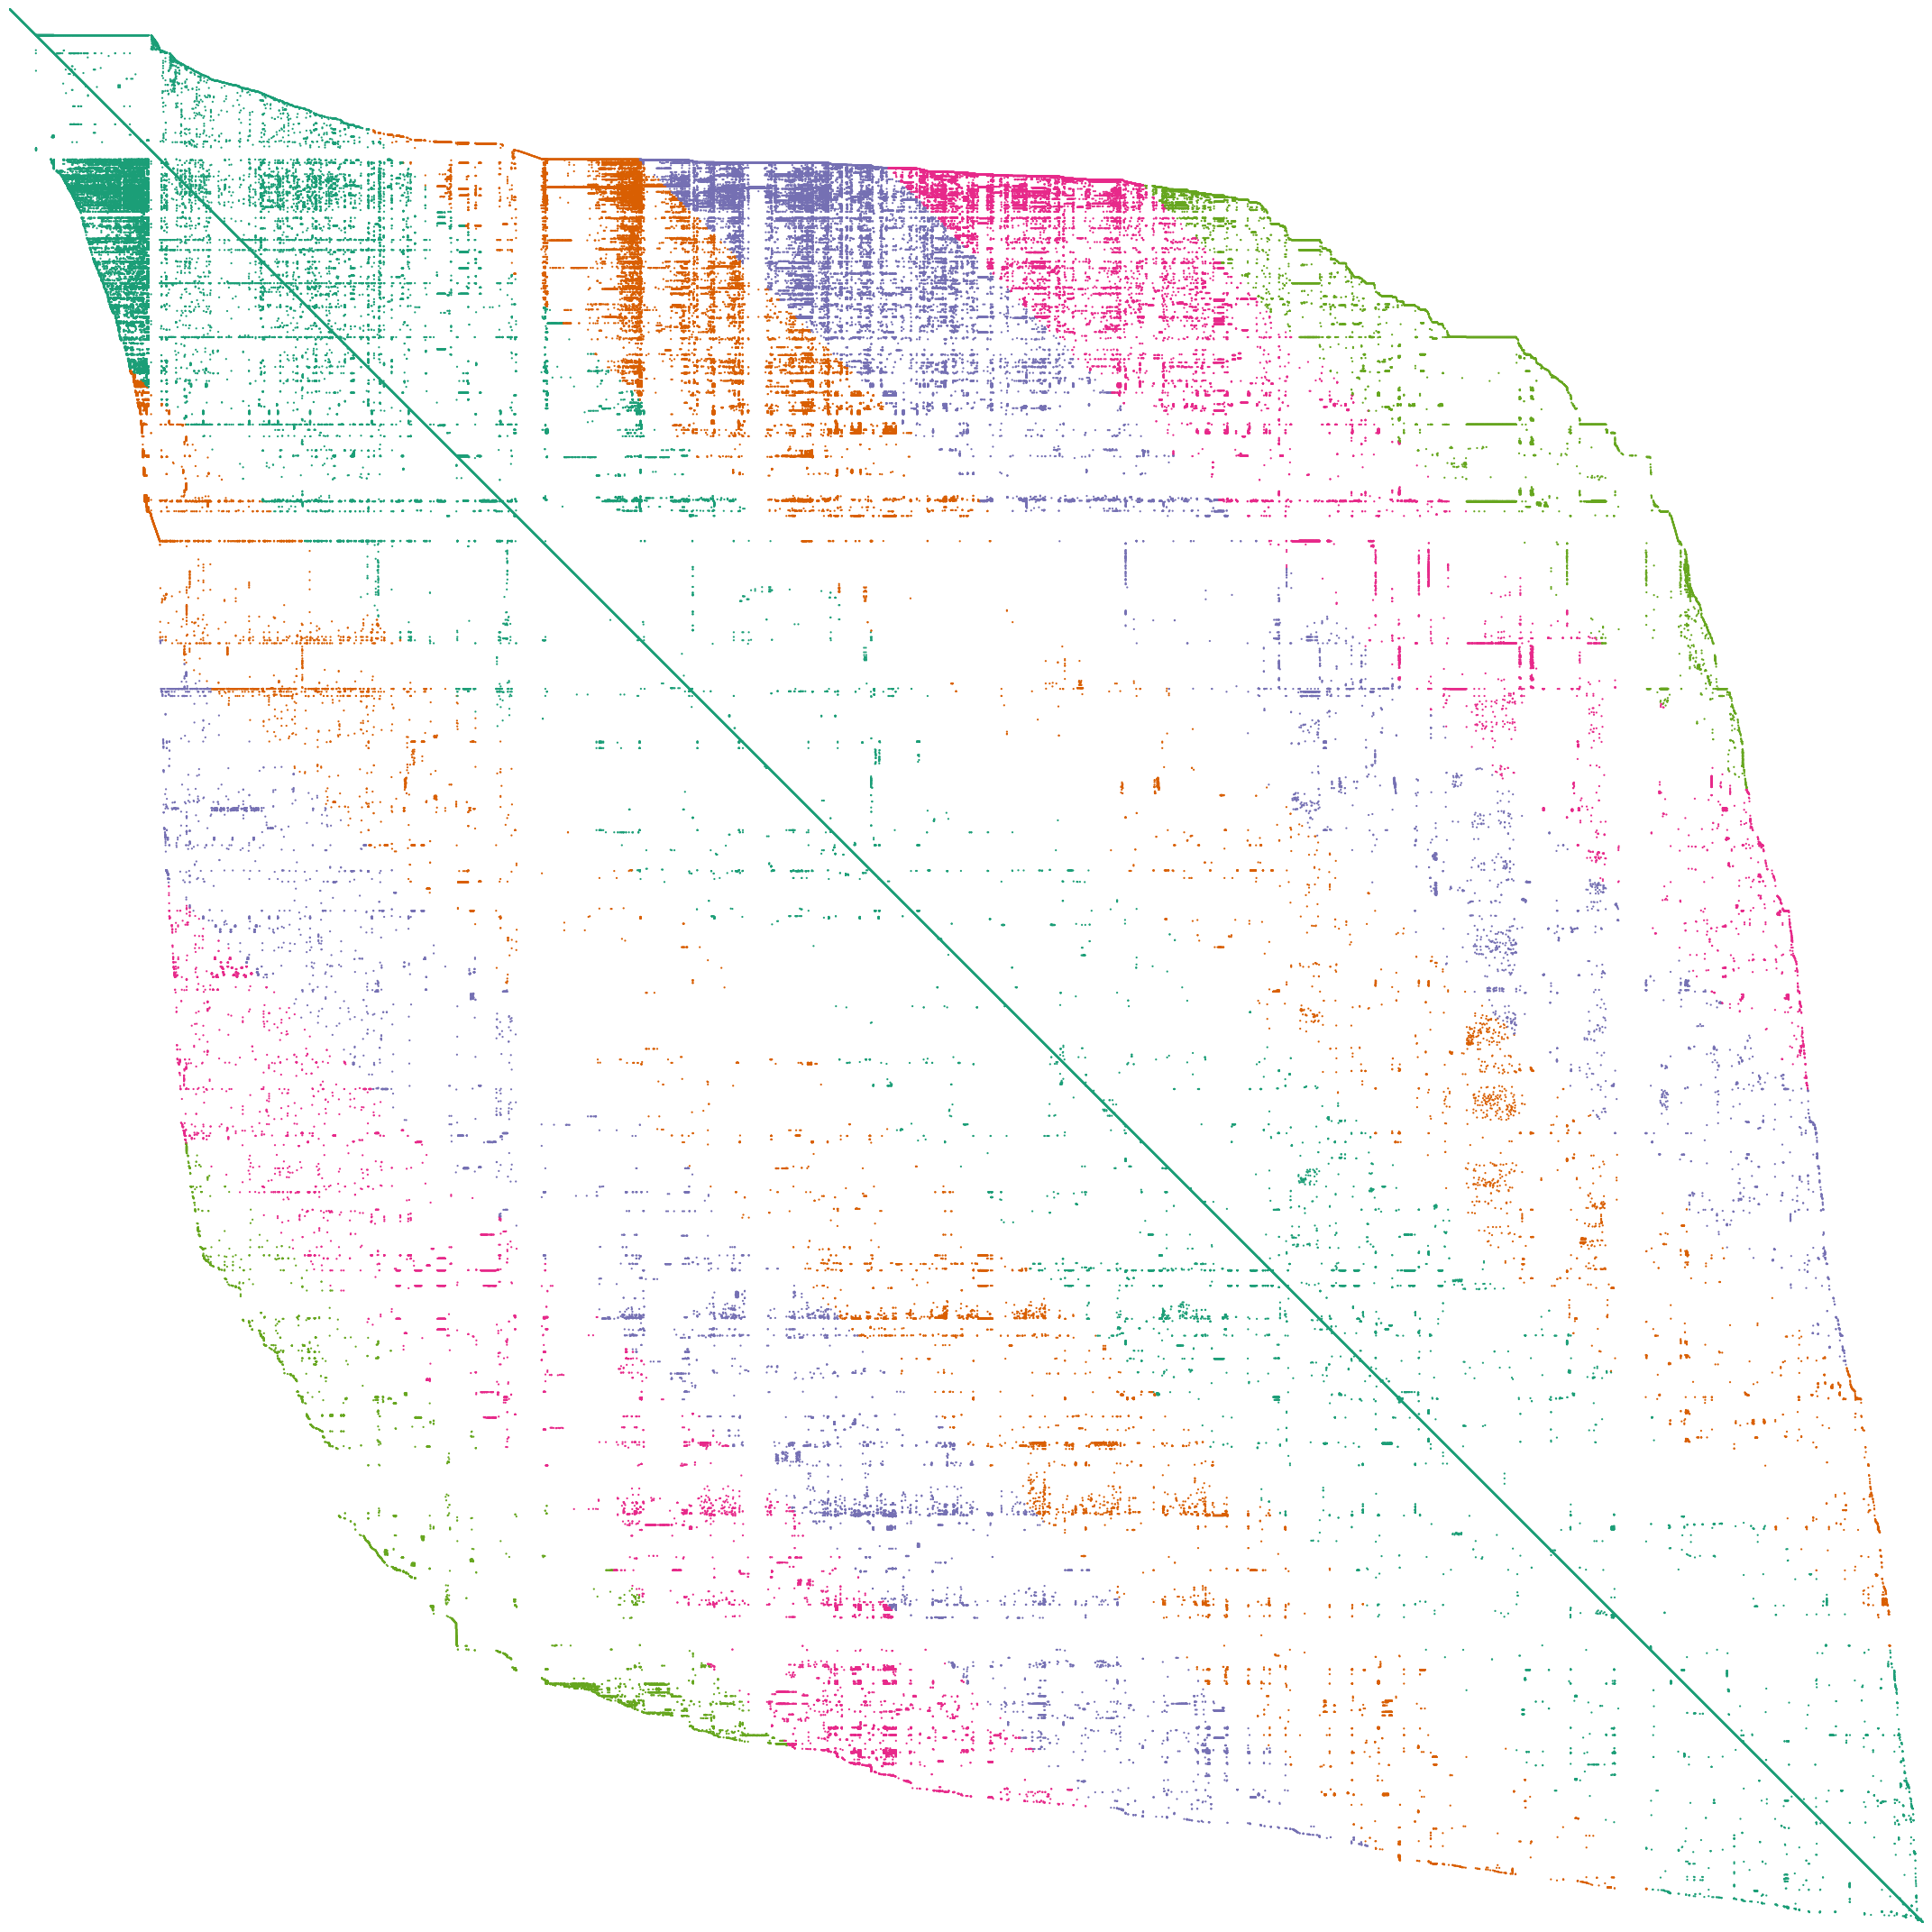

In [7]:
eidb.graph_technosphere()

Nice graphic! But it doesn't really tell us much... Let's have a bit of a closer look at what our database contains. We can, for instance, examine a random process of the imported ecoinvent database by doing the following:

In [ ]:
random_act = eidb.random()
random_act.as_dict()

To get an overview of all exchanges of the selected process, type:

In [ ]:
for exc in random_act.exchanges():
    print(exc)

And if you want to get more information on one specific exchange of the chosen process, do:

In [ ]:
# Change the numeral to check out the other exchanges (as from the list above)
[exc for exc in random_act.exchanges()][0].as_dict()

Sometimes it can also be helpful to have some activity characteristics at hand, for instance if you want to search a database using an activity's `code` or want to get an activity's name when only having its `key`...

First, we can get the `code`:

In [11]:
random_act["code"]

'f5578b0c6e1ed74caf92574580a58174'

We can get the random activity's name from the `code`:

In [12]:
eidb.get(random_act["code"])

'planting with starter fertiliser, by no till planter' (hectare, BR, None)

And now we can get the `key`:

In [13]:
# Getting an activity's key
random_act.key

('ecoinvent-3.9.1-cutoff', 'f5578b0c6e1ed74caf92574580a58174')

We can also get the random activity's name from the `key`:

In [14]:
# Getting an activity's name using its key
bd.get_activity(random_act.key)

'planting with starter fertiliser, by no till planter' (hectare, BR, None)

<a id='section24'></a>
### 2.4 Importing a Foreground Dataset from Excel

In addition to the import of a standard background database, we can also create a database, like a bespoke foreground. There are several file types that work when developing a foreground inventory, one of them being Excel.

This works relatively smoothly, provided the Excel workbook is created correctly. Here, we import a flawless dataset, but it may be that you have a dataset that has some inconsistencies in the import. In that case, check that the units in the foreground match those in the background database (1L of diesel vs 1kg of diesel would be a fault, for example), check your reference products are correct for the database you are referencing, look for spelling errors, ... You should also check that your template layout (like row spacing, columns used) matches the template perfectly.

If you have a foreground database with several activites that calls on data from other databases that you have created, _all_ of the databases will need to be added. For example, there's one database, `car_db` that contains a process, `car`, and `car` contains processes `body` and `wheels` from the database `parts_db`, you need to execute the following code for both of these databases.

OK this is a small example, so it looks like everything is wrong! In fact, only one input was incorrect: the unit for aluminium scrap. I sneakily changed this to square meter instead of kilogram. Since there are lots of processes that rely on this input in one way or another, nothing matched. Let's fix this and try again.

<a id='section241'></a>
#### 2.4.1 Matching the Database

Why do we match the our database (`fg_db` in this case) to itself? We are trying to match the activites we've imported to each other, so this matches all the foreground databases we have.

```{admonition} File Download
:class: note
You can download the the example database here: \
{download}`excel_importer_example.xlsx <https://github.com/brightway-lca/brightway-book/raw/refs/heads/main/content/chapters/BW25/_data/excel_importer_example.xlsx>`
```

In [25]:
fg_db = bi.ExcelImporter("excel_importer_example.xlsx")

Extracted 2 worksheets in 4.71 seconds


Now we match our foreground to itself. This means all that activities we made using other activities in our dataset will get matched. We should match on fields that will make the dataset unique to ensure independent flows. You **must** execute `.apply_strategies()` before matching the databases.

In [26]:
fg_db.apply_strategies()
fg_db.match_database(fields=["name", "unit", "reference product", "location"])

Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 5.74 seconds
Applying strategy: link_iterable_by_fields


Now we match our foreground to our background (ecoinvent). We should match the foreground to the ecoinvent database using the "reference product" as well because we may have some products that have several outputs (one process but 2 outcomes of the same unit)

In [27]:
# Need to match fg_db to ecoinvent
fg_db.match_database(
    "ecoinvent-3.9.1-cutoff", fields=["name", "unit", "location", "reference product"]
)

Applying strategy: link_iterable_by_fields


Now we match our foreground to the biosphere flows:

In [28]:
fg_db.match_database("ecoinvent-3.9.1-biosphere", fields=["name", "categories", "location"])

Applying strategy: link_iterable_by_fields


Let's get some statistics from our dataset and check that everything imported correctly. We should have 0 unlinked exchanges. 

In [29]:
fg_db.statistics()

2 datasets
	5 exchanges
	Links to the following databases:
		ecoinvent-3.9.1-cutoff (3 exchanges)
		ecoinvent-3.9.1-biosphere (1 exchanges)
		Water bottle LCA (1 exchanges)
	0 unlinked exchanges (0 types)
		


(2, 5, 0, 0)

Great! our statistics show we have no unlinked exchanges, that means everything got imported well. We can go ahead and write our database to the disk.

In [30]:
fg_db.write_database()

Not able to determine geocollections for all datasets. This database is not ready for regionalization.


100%|██████████| 2/2 [00:00<00:00, 2386.52it/s]

Vacuuming database 


Created database: Water bottle LCA


Again, we check that the `fg_db` is now written to disk:

In [31]:
bd.databases

Databases dictionary with 3 object(s):
	Water bottle LCA
	ecoinvent-3.9.1-biosphere
	ecoinvent-3.9.1-cutoff

There we go! 🍾

<a id='section242'></a>
#### 2.4.2 Unlinked Exchanges

Let's take a small deviation to address unlinked exchanges and what these mean. You'll inevitably come across them as you develop with Brightway.

**What are unlinked exchanges?**

These are activities that are not connected to any other activities or elementary flows (flows contained in the biosphere). Most often, when we create foreground matrices, these come from some fault of the user (unit error, incorrect template format, spelling error, ...). We can find these errors by calling the function `"write_excel()"`. 

Or, on a deeper level, this could be because there are some biosphere flows used in ecoinvent (our database we're using) that do not exist in the BW25 biosphere3 database (and, consequently, in the BW25 LCIA methods). The best we can do is to import these unlinked flows into another biosphere database. In this case, you'd need to run the line `importer.add_unlinked_flows_to_biosphere_database()`, and then re-import your ecoinvent database. If these flows are important to you, you should do further matching or modify the relevant LCIA methods to include them.

```{admonition} File Download
:class: note
You can download the the example database here: \
{download}`excel_importer_example_w_unlinked.xlsx <https://github.com/brightway-lca/brightway-book/raw/refs/heads/main/content/chapters/BW25/_data/excel_importer_example_w_unlinked.xlsx>`
```

In [32]:
fg_db_u = bi.ExcelImporter("excel_importer_example_w_unlinked.xlsx")

Extracted 2 worksheets in 4.79 seconds


In [33]:
fg_db_u.apply_strategies()
fg_db_u.match_database(fields=["name", "unit", "reference product", "location"])

Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 5.45 seconds
Applying strategy: link_iterable_by_fields


In [39]:
fg_db_u.match_database(
    "ecoinvent-3.9.1-cutoff", fields=["name", "unit", "location", "reference product"]
)

Applying strategy: link_iterable_by_fields


In [40]:
fg_db_u.match_database("ecoinvent-3.9.1-biosphere", fields=["name", "categories", "location"])

Applying strategy: link_iterable_by_fields


In [41]:
fg_db_u.statistics()

2 datasets
	5 exchanges
	Links to the following databases:
		ecoinvent-3.9.1-cutoff (3 exchanges)
		ecoinvent-3.9.1-biosphere (1 exchanges)
	1 unlinked exchanges (1 types)
		Type technosphere: 1 unique unlinked exchanges


(2, 5, 1, 0)

Oh no! An unlinked exchange!! Let's try to localize it...

In [43]:
list(fg_db_u.unlinked)

[{'name': 'water bottle production',
  'amount': 0.005,
  'unit': 'piece',
  'database': 'Water bottle LCA',
  'categories': ('None',),
  'location': 'RER',
  'type': 'technosphere',
  'reference product': 'water bottle',
  'uncertainty type': 5,
  'loc': 0.005,
  'minimum': 0.0005,
  'maximum': 0.05}]

You can check whether the import went as expected by having a look at an Excel sheet, that includes our process data. The location of this file is given as output of the following line of code. You can then find the excel (generally in your local folder) to find whether all the activites in your database correctly matched.

In [ ]:
fg_db_u.write_excel()

Let's look at the file (use your terminal to `cd` into the `.local` folder and navigate to the `output` folder containing the Excel file):

![screenshot1](./_images/screenshot_1.png)

We can see that one activity, water bottle production, did not match. And I think I know why 😏 The unit value is not correct. We accidentally assigned the it the unit value "piece", when we had originally constructed our water bottle production activity to be per "unit" created. 

![screenshot2](./_images/screenshot_2.png)

Unlinked exchanges can happen for a variety of reasons, almost always a user fault. Double-check your spelling, capitalizations, hyphenations, reference products, units used, and ensure you have the correct template format. This should help reduce the occurrence of unlinked exchanges. 

Since we didn't write this to our disk (`bd.write_database()`), we have not saved the database. We can proceed with our correctly imported foreground from here on out. 

In [107]:
# Should you have a problem with "unlinked exchanges" when importing ecoinvent or your background DB
# ei_importer = bi.SingleOutputEcospold2Importer(ei_path, ei_name)
# ei_importer.add_unlinked_flows_to_biosphere_database()
# ei_importer.apply_strategies()
# ei_importer.statistics()
# ei_importer.write_database()

<a id='section243'></a>
#### 2.4.3 Exploring our Foreground Database

Let's look around and explore the activities stored in our database before moving further. 

We can iterate through all of our activites in our database. You probably don't want to run this if you have many many activities :)

In [45]:
bd.databases

Databases dictionary with 3 object(s):
	Water bottle LCA
	ecoinvent-3.9.1-biosphere
	ecoinvent-3.9.1-cutoff

In [6]:
wb = bd.Database("Water bottle LCA")

# Print all activities that are in our water bottle database.
for act in wb:
    print(act)

'Drinking water from a bottle' (liter, RER, None)
'water bottle production' (unit, RER, None)


We can think of our database as a graph, where we can link our activities (nodes) via exchanges (edges). 

Let's take a look at the exchanges for one activity in the database. 

In [8]:
# Get one activity from the database "water bottle". In this case, we get the 0th (or "first") one.
our_activity = [act for act in wb][0]
print(our_activity)

'Drinking water from a bottle' (liter, RER, None)


We can pint all the exchanges for our activity:

In [9]:
for exc in our_activity.exchanges():
    print(exc)

Exchange: 0.005 unit 'water bottle production' (unit, RER, None) to 'Drinking water from a bottle' (liter, RER, None)>
Exchange: 1 kilogram 'market group for tap water' (kilogram, RER, None) to 'Drinking water from a bottle' (liter, RER, None)>


...or create a list of activities through a Python list comprehension:

In [10]:
[e for e in our_activity.exchanges()]

[Exchange: 0.005 unit 'water bottle production' (unit, RER, None) to 'Drinking water from a bottle' (liter, RER, None)>,
 Exchange: 1 kilogram 'market group for tap water' (kilogram, RER, None) to 'Drinking water from a bottle' (liter, RER, None)>]

Now let's see whether the details of our biosphere exchange are correct:

In [11]:
act = [act for act in wb if "water bottle production" in act["name"]][0]
print(act)

# Get a specific exchange (CO2 in this case) of an activity
[exc for exc in act.exchanges() if "Carbon dioxide" in str(exc)][0].as_dict()

'water bottle production' (unit, RER, None)


{'name': 'Carbon dioxide, fossil',
 'amount': 0.1,
 'unit': 'kilogram',
 'database': 'biosphere3',
 'categories': ('air',),
 'type': 'biosphere',
 'reference product': 'none',
 'uncertainty type': 0,
 'input': ('ecoinvent-3.9.1-biosphere',
  '349b29d1-3e58-4c66-98b9-9d1a076efd2e'),
 'output': ('Water bottle LCA', 'act1')}

We can also find an activity by its code:

In [12]:
activity_by_code = wb.get("act2")
activity_by_code

'Drinking water from a bottle' (liter, RER, None)

<a id='section7'></a>
#### 2.4.4 Deleting Processes/Databases/Projects

There are more ways than what is shown here to delete your data.

To delete an activity:

In [ ]:
for act in wb:
    if act['name']=='Drinking water from a bottle':
        act.delete()

You can check if your activity has been deleted:

In [ ]:
wb.search('Drinking water from a bottle') # Should return an empty list

To delete an entire database:

In [ ]:
del bd.databases["<the_db_name>"]

You can check if the db has been deleted:

In [ ]:
bd.databases

To delete a project: 

In [ ]:
bd.projects.delete_project("<the_project_name>",delete_dir=True)

'default'

<a id='section3'></a>
## 3. LCIA

Before continuing with a simple product system example, the basics of the inventory caluclation shall be introduced. First, let's have a look at which LCIA methods we can access.

Let's list a few of the impact assessment methods.

<a id='section31'></a>
### 3.1 LCIA Method Selection

In [13]:
# If you want a list of all methods, remove the [:5]. This is only to show you the first five elements in the list (it's very long...)
list(bd.methods)[:5]

[('ecoinvent-3.9.1',
  'CML v4.8 2016 no LT',
  'acidification no LT',
  'acidification (incl. fate, average Europe total, A&B) no LT'),
 ('ecoinvent-3.9.1',
  'CML v4.8 2016 no LT',
  'climate change no LT',
  'global warming potential (GWP100) no LT'),
 ('ecoinvent-3.9.1',
  'CML v4.8 2016 no LT',
  'ecotoxicity: freshwater no LT',
  'freshwater aquatic ecotoxicity (FAETP inf) no LT'),
 ('ecoinvent-3.9.1',
  'CML v4.8 2016 no LT',
  'ecotoxicity: marine no LT',
  'marine aquatic ecotoxicity (MAETP inf) no LT'),
 ('ecoinvent-3.9.1',
  'CML v4.8 2016 no LT',
  'ecotoxicity: terrestrial no LT',
  'terrestrial ecotoxicity (TETP inf) no LT')]

Ok, we see that there are quite a few methods that we could use for our LCA. Can we get more details on them? Sure we can! Those details are stored as values (`bd.methods.values()`), with the method names being the keys (`bd.methods.keys()`).

Let's just check for the first two methods:

In [14]:
for key in list(bd.methods)[:2]:
    print(key, ":", bd.methods[key])

('ecoinvent-3.9.1', 'CML v4.8 2016 no LT', 'acidification no LT', 'acidification (incl. fate, average Europe total, A&B) no LT') : {'unit': 'kg SO2-Eq', 'filepath': '/Users/michaelweinold/Library/Application Support/EcoinventInterface/cache/ecoinvent 3.9.1_LCIA_implementation/LCIA Implementation 3.9.1.xlsx', 'ecoinvent_version': '3.9.1', 'database': 'ecoinvent-3.9.1-biosphere', 'abbreviation': 'ecoinvent-391caa.a2ba14654af2e27beeb6579f81e9ed5a', 'num_cfs': 21, 'geocollections': ['world']}
('ecoinvent-3.9.1', 'CML v4.8 2016 no LT', 'climate change no LT', 'global warming potential (GWP100) no LT') : {'unit': 'kg CO2-Eq', 'filepath': '/Users/michaelweinold/Library/Application Support/EcoinventInterface/cache/ecoinvent 3.9.1_LCIA_implementation/LCIA Implementation 3.9.1.xlsx', 'ecoinvent_version': '3.9.1', 'database': 'ecoinvent-3.9.1-biosphere', 'abbreviation': 'ecoinvent-391ccg.fca343cf23c6362bcfddef951b0813d8', 'num_cfs': 149, 'geocollections': ['world']}


Now, let's select a some LCIA methods to be applied in an inventory calculation. The following line of code will return a list containing all methods that match our criteria of "climate change".

In [15]:
CC_methods = [m for m in bd.methods if "climate change" == m[2].lower()]
CC_methods

[('ecoinvent-3.9.1',
  'CML v4.8 2016',
  'climate change',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.9.1',
  'Ecological Scarcity 2021',
  'climate change',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.9.1',
  'EF v3.0',
  'climate change',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.9.1',
  'EF v3.1',
  'climate change',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.9.1',
  'IMPACT 2002+ (Endpoint)',
  'climate change',
  'climate change'),
 ('ecoinvent-3.9.1', 'IMPACT 2002+ (Endpoint)', 'climate change', 'total'),
 ('ecoinvent-3.9.1',
  'IPCC 2013',
  'climate change',
  'global temperature change potential (GTP100)'),
 ('ecoinvent-3.9.1',
  'IPCC 2013',
  'climate change',
  'global temperature change potential (GTP20)'),
 ('ecoinvent-3.9.1',
  'IPCC 2013',
  'climate change',
  'global warming potential (GWP100)'),
 ('ecoinvent-3.9.1',
  'IPCC 2013',
  'climate change',
  'global warming potential (GWP20)'),
 ('ecoinvent-3.9.1',
  'IPCC 2

We will use the EF v3.1 method in our LCIA calculations:

In [16]:
ef_gwp_key = [
    m for m in bd.methods if "climate change" == m[2] and "EF v3.1" == m[1]
].pop()
print(ef_gwp_key)

# We can look at the method details
ef_gwp_method = bd.Method(ef_gwp_key)
print(ef_gwp_method)

('ecoinvent-3.9.1', 'EF v3.1', 'climate change', 'global warming potential (GWP100)')
Brightway2 Method: ecoinvent-3.9.1: EF v3.1: climate change: global warming potential (GWP100)


<a id='section32'></a>
### 3.2 Performing the LCA

In the next cell, we will execute 4 lines of code to perform our LCA - yep, just 4 lines! Let's get a breakdown of what is going on here:

`bc.LCA({our_activity: 1}, ef_gwp_key)`: we create an LCA 'object' that requires the demand of our LCA (functional unit) and the method as a tuple <br>
`lca.lci()`: Calculates the life cycle inventory from technosphere and biosphere matrices based on the demand<br>
`lca.lcia()`: Calculates the impact by multiplying the characterization matrix from our chosen method with the LCI matrix created in the prior line of code.<br>
`lca.score()`: Returns the LCA score

In [17]:
ef_gwp_key

('ecoinvent-3.9.1',
 'EF v3.1',
 'climate change',
 'global warming potential (GWP100)')

In [19]:
my_functional_unit, data_objs, _ = bd.prepare_lca_inputs(
    {our_activity: 1},
    method=ef_gwp_key,
)
my_lca = bc.LCA(demand=my_functional_unit, data_objs=data_objs)
my_lca.lci()
my_lca.lcia()
my_lca.score

0.00242881156479975

Cool! We got some results :) But calculating the LCA results for an individual activity and individual impact category is going to be tedious if we have lots of activities and impact categories to look into. Let's step into the world of MultiLCA.

<a id='section4'></a>
## 4. MultiLCA

We can use MultiLCA to calculate the LCA for 1 activity and N methods, N activites and 1 method, or N activities and N methods. Let's see how to do the first and last examples. Note that the `multiLCA` function [has changed in 2024](https://github.com/brightway-lca/brightway2-calc/blob/main/CHANGES.md#new-multilca-implementation). We are using the new syntax here.

### 4.1 Calculate 1 Activity for N Methods

In [20]:
ef_methods = list(filter(lambda x: "EF v3.1 no LT" in x[1], list(bd.methods)))
print("We have", len(ef_methods), "EF v3.1 no LT methods we will evaluate.")

We have 25 EF v3.1 no LT methods we will evaluate.


Let's look again at all our activities:

In [21]:
for act in wb:
    print(act["code"])

# Get details on our database
print(wb)

act2
act1
Brightway2 SQLiteBackend: Water bottle LCA


In [22]:
functional_units_1 = {
    "act1": {wb.get("act1").id: 1},
}
config_1 = {
    "impact_categories": ef_methods
}
data_objs_1 = bd.get_multilca_data_objs(functional_units=functional_units_1, method_config=config_1)

In [23]:
mlca_1 = bc.MultiLCA(demands=functional_units_1, method_config=config_1, data_objs=data_objs_1)
mlca_1.lci()
mlca_1.lcia()
mlca_1.scores

{(('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'acidification no LT',
   'accumulated exceedance (AE) no LT'),
  'act1'): 0.0037806030334203338,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change no LT',
   'global warming potential (GWP100) no LT'),
  'act1'): 0.42409124128704695,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change: biogenic no LT',
   'global warming potential (GWP100) no LT'),
  'act1'): 0.0023278907422698584,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change: fossil no LT',
   'global warming potential (GWP100) no LT'),
  'act1'): 0.4213350890637638,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change: land use and land use change no LT',
   'global warming potential (GWP100) no LT'),
  'act1'): 0.0004282614810132068,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'ecotoxicity: freshwater no LT',
   'comparative toxic unit for ecosystems (CTUe) no LT'),
  'act1'): 3.950928376697637,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'ec

### 4.2 Calculate N Activites for N Methods

If you want to look at only a couple activities, you can do this manually with the code below.

In [24]:
functional_units_2 = {
    "act1": {wb.get("act1").id: 1},
    "act2": {wb.get("act2").id: 1},
}
config_2 = {
    "impact_categories": ef_methods
}
data_objs_2 = bd.get_multilca_data_objs(functional_units=functional_units_2, method_config=config_2)

In [25]:
mlca_2 = bc.MultiLCA(demands=functional_units_2, method_config=config_2, data_objs=data_objs_2)
mlca_2.lci()
mlca_2.lcia()
mlca_2.scores

{(('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'acidification no LT',
   'accumulated exceedance (AE) no LT'),
  'act1'): 0.0037806030334203338,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'acidification no LT',
   'accumulated exceedance (AE) no LT'),
  'act2'): 2.0581056254844843e-05,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change no LT',
   'global warming potential (GWP100) no LT'),
  'act1'): 0.42409124128704695,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change no LT',
   'global warming potential (GWP100) no LT'),
  'act2'): 0.0024288104863856067,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change: biogenic no LT',
   'global warming potential (GWP100) no LT'),
  'act1'): 0.0023278907422698584,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change: biogenic no LT',
   'global warming potential (GWP100) no LT'),
  'act2'): 1.2792075587645135e-05,
 (('ecoinvent-3.9.1',
   'EF v3.1 no LT',
   'climate change: fossil no LT',
   'global warmin

### 4.3 MLCA Results as a DataFrame

In [26]:
dfresults = pd.DataFrame.from_dict(mlca_2.scores, orient='index')
dfresults.index = pd.MultiIndex.from_tuples(dfresults.index, names=['Column', 'Row'])
dfresults = dfresults.unstack(level=0)

In [27]:
dfresults

0  \
Column (ecoinvent-3.9.1, EF v3.1 no LT, acidification no LT, accumulated exceedance (AE) no LT)   
Row                                                                                               
act1                                             0.003781                                         
act2                                             0.000021                                         

                                                                                                        \
Column (ecoinvent-3.9.1, EF v3.1 no LT, climate change no LT, global warming potential (GWP100) no LT)   
Row                                                                                                      
act1                                             0.424091                                                
act2                                             0.002429                                                

                                                                                                                  \
Column (ecoinvent-3.9.1, EF v3.1 no LT, climate change: biogenic no LT, global warming potential (GWP100) no LT)   
Row                                                                                                                
act1                                             0.002328                                                          
act2                                             0.000013                                                          

                                                                                                                \
Column (ecoinvent-3.9.1, EF v3.1 no LT, climate change: fossil no LT, global warming potential (GWP100) no LT)   
Row                                                                                                              
act1                                             0.421335                                                        
act2                                             0.002413                                                        

                                                                                                                                      \
Column (ecoinvent-3.9.1, EF v3.1 no LT, climate change: land use and land use change no LT, global warming potential (GWP100) no LT)   
Row                                                                                                                                    
act1                                             0.000428                                                                              
act2                                             0.000003                                                                              

                                                                                                                            \
Column (ecoinvent-3.9.1, EF v3.1 no LT, ecotoxicity: freshwater no LT, comparative toxic unit for ecosystems (CTUe) no LT)   
Row                                                                                                                          
act1                                             3.950928                                                                    
act2                                             0.021163                                                                    

                                                                                                                                        \
Column (ecoinvent-3.9.1, EF v3.1 no LT, ecotoxicity: freshwater, inorganics no LT, comparative toxic unit for ecosystems (CTUe) no LT)   
Row                                                                                                                                      
act1                                             3.848191                                                                                
act2                                             0.

There we go! Now we can export this to CSV if we want to use it elsewhere.

In [63]:
dfresults.to_csv("mlca_results.csv", sep=',')

<a id='section41'></a>
### 4.4 Visualisation of MLCA Results

Let's use the example dataframe from above. We'll need to import the matplotlib package.

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt

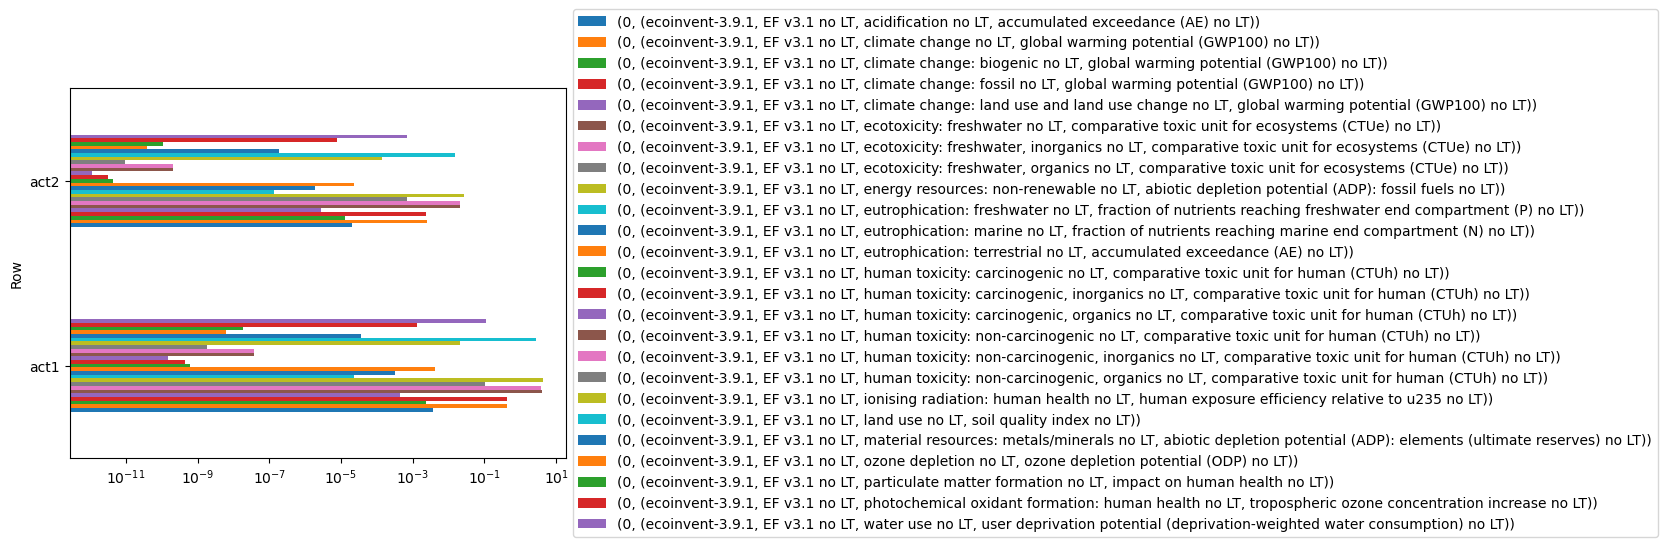

In [247]:
dfresults.plot(kind="barh")
ax = plt.subplot(111)
plt.xscale("log")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height, box.width, box.height])
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

Clearly, we are plotting a bunch of impact categories, and the plot itself is a bit difficult to interpret. You will have to choose what data you will want to represent and how; hopefully this is a good start in the right direction. 

<a id='section5'></a>
## 5. Basic Contribution Analysis
Another thing we'd like to do with our LCA is to see from where impacts stem in the supply chain. We can do this with a contribution analysis.

In [120]:
import bw2analyzer as bwa

In [121]:
bwa.utils.print_recursive_calculation(
    ("Water bottle LCA", "act1"),
    ef_methods[2],
    amount=1,  # How much of the activity? (same as in our FU)
    max_level=2,  # How many levels deep in the CA do you want to go?
)

Fraction of score | Absolute score | Amount | Activity
0001 | 0.002328 |     1 | 'water bottle production' (unit, RER, None)
  0.866 | 0.002016 |  0.33 | 'treatment of aluminium scrap, post-consumer, prepared for recycling, at remelter' (kilogram, RER, No
    0.358 | 0.0008336 | 0.333 | 'market for aluminium scrap, post-consumer, prepared for melting' (kilogram, GLO, None)
    0.0378 | 8.802e-05 | 0.004565 | 'market for copper, cathode' (kilogram, GLO, None)
    0.0344 | 8.004e-05 | 0.04388 | 'market group for electricity, medium voltage' (kilowatt hour, RER, None)
    0.426 | 0.0009908 | 0.005005 | 'market for silicon, metallurgical grade' (kilogram, GLO, None)
  0.134 | 0.0003123 |  0.33 | 'impact extrusion of aluminium, deformation stroke' (kilogram, RER, None)
    0.134 | 0.0003123 | 0.1739 | 'market group for electricity, low voltage' (kilowatt hour, RER, None)


This is just one way of doing a contribution analysis. However, this way doesn't return something that can be readily used. Let's print our contribution analysis to an object. (Also, checkout the brightway2analyzer package in the documentation for more functions related to contribution analysis.).

We can now print the contribution analysis after putting it in a Pandas DataFrame:

In [122]:
ca = bwa.utils.recursive_calculation_to_object(
    ("Water bottle LCA", "act1"),
    ef_methods[2],
    amount=1,  # How much of the activity? (same as in our FU)
    max_level=2,  # How many levels deep in the CA do you want to go?
)
pd.DataFrame(ca)

,label,parent,score,fraction,amount,name,key
0,root,None,0.002328,1.000000,1.000000,water bottle production,"(Water bottle LCA, act1)"
1,root_a,root,0.002016,0.865860,0.330000,"treatment of aluminium scrap, post-consumer, p...","(ecoinvent-3.9.1-cutoff, 290d83cc6e3555585f970..."
2,root_a_c,root_a,0.000834,0.358110,0.332963,"market for aluminium scrap, post-consumer, pre...","(ecoinvent-3.9.1-cutoff, 565119862217b3bf2c19a..."
3,root_a_f,root_a,0.000088,0.037812,0.004565,"market for copper, cathode","(ecoinvent-3.9.1-cutoff, 8b62f30ed586a5f23611e..."
4,root_a_g,root_a,0.000080,0.034385,0.043885,"market group for electricity, medium voltage","(ecoinvent-3.9.1-cutoff, 0c02fccd63475e8f7e6b9..."
5,root_a_q,root_a,0.000991,0.425638,0.005005,"market for silicon, metallurgical grade","(ecoinvent-3.9.1-cutoff, 1ffe09506f70be4dcd980..."
6,root_b,root,0.000312,0.134139,0.330000,"impact extrusion of aluminium, deformation stroke","(ecoinvent-3.9.1-cutoff, aea60472ac8727f9a3a17..."
7,root_b_a,root_b,0.000312,0.134139,0.173910,"market group for electricity, low voltage","(ecoinvent-3.9.1-cutoff, 6f3bff7be2bf2f55a7afd..."


<a id='section6'></a>
## 6. Brightway to LCA Matrices Correspondence

In [202]:
functional_unit = {bd.get_activity(("Water bottle LCA", "act1")): 1}
lca = bc.LCA(functional_unit, ef_gwp_key)
lca.lci()
lca.lcia()
lca.score

0.424091418770204

- the technosphere matrix:

In [203]:
print(lca.technosphere_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 266446 stored elements and shape (21240, 21240)>
  Coords	Values
  (0, 0)	1.0
  (0, 4224)	-0.9473657011985779
  (0, 10568)	-0.9473657011985779
  (1, 1)	1.0
  (1, 11549)	-1.1300685405731201
  (2, 2)	1.0
  (2, 15150)	-0.003932278603315353
  (3, 3)	1.0
  (3, 2491)	-1.0
  (3, 9604)	-1.0
  (4, 4)	1.0
  (4, 172)	-0.5820000171661377
  (4, 418)	-0.5820000171661377
  (4, 586)	-1.4500000476837158
  (4, 599)	-1.2799999713897705
  (4, 1055)	-1.4500000476837158
  (4, 2171)	-1.2799999713897705
  (4, 2385)	-0.8730000257492065
  (4, 2664)	-0.29100000858306885
  (4, 2764)	-1.159999966621399
  (4, 3348)	-1.2799999713897705
  (4, 3515)	-1.2799999713897705
  (4, 3648)	-1.2799999713897705
  (4, 3887)	-1.2799999713897705
  (4, 3917)	-0.0025500000920146704
  :	:
  (21234, 12374)	-4.442864565135096e-08
  (21234, 12570)	-2.277102112202556e-06
  (21234, 13023)	-101316.5859375
  (21234, 13500)	-8.500683179590851e-08
  (21234, 15423)	-2.085283767883083

- the biosphere matrix:

In [ ]:
print(lca.biosphere_matrix)

- the characterization matrix:

In [99]:
print(lca.characterization_matrix)

- the inventory:

In [100]:
print(lca.inventory)

- the characterized inventory:

In [101]:
print(lca.characterized_inventory)

- the demand and supply arrays:

In [ ]:
print(lca.demand_array)  # Contains what we entered as final demand.
print(
    lca.demand_array.sum()
)  # Check that demand array only contains our demand by summing up the whole array
lca.supply_array  # equals the multiplication of our inverted transaction matrix by the final demand, i.e. (Ae-1)*y

## 8. Uncertainty Information in Brightway

Uncertainty is stored at the level of the exchanges - remember this! So, let's have a look at a random ecoinvent exchange:

In [ ]:
[exc for exc in eidb.random().exchanges()][0].as_dict()

The *necessary* uncertainty information of an exchange is described in the following fields:  
  - **'uncertainty type'** : type of probability distribution function that the exchange follows. For example, the uncertainty type = 2 indicates a `lognormal`  distribution.  
  - **'loc', 'scale', 'shape', 'minimum', 'maximum'**: parameters of the distribution function, which are respectively the location (mean $\mu$, mode, offset, or median), scale (e.g. standard deviation $\sigma$), and shape as well as minimum and maximum of the underlying distribution. Mind that different distribution functions require different parameters - not all parameters have to be defined for each distribution.

Some *additional* uncertainty related information ('scale without pedigree', 'pedigree') are also there, but are not directly used in the calculation of the uncertainty. They are also specific to ecoinvent.

Uncertainty in Brightway is dealt with using a Python package called `stats_arrays` (see [here](http://stats-arrays.readthedocs.io/en/latest/)), developed by Chris Mutel in the context of the development of Brightway but applicable to any stochastic model in Python. Have a look at it to see which probability distribution functions are available. And then, let's import this package!

In [29]:
import stats_arrays

Just to give a brief example of how the uncertainty information "works", let's have a look at the lognormal distribution. As a reminder:   
  - a random variable $X$ is a lognormal if its natural logarithm $ln(X)$ is normally distributed  
  - the natural logarithm of the *median* of the lognormal distribution is equal to the median (=mean) of the underlying distribution  

Taking the deterministic amount `amount` to be the median, we should have `loc` = `ln('amount')`. Let's do this for the first exchange of a random ecoinvent activity that has a lognormal distribution:

In [ ]:
e = [exc for exc in eidb.random().exchanges() if exc["uncertainty type"] == 2][0]
e.as_dict()

In [31]:
e["loc"] == np.log(e["amount"])

True

## 9. Basic Monte Carlo Simulation

### 9.1 One Func.Unit and One Impact Category

We perform a Monte Carlo (MC) simulation with 10 iterations for our banana production and the `IPCC GWP100a` method:

In [8]:
banana = [
    act for act in eidb if "banana" in act["name"] and "CO" in act["location"]
][0]
banana

'banana production' (kilogram, CO, None)

In [9]:
gwp_method = [m for m in bd.methods if "global warming potential (GWP100)" in m and "IPCC 2013" in m][0]
gwp_method

('ecoinvent-3.9.1',
 'IPCC 2013',
 'climate change',
 'global warming potential (GWP100)')

In [17]:
mc_functional_unit, mc_data_objs, _ = bd.prepare_lca_inputs(
    {banana: 1},
    method=gwp_method,
)
mc_lca = bc.LCA(demand=mc_functional_unit, data_objs=mc_data_objs, use_distributions=True)
mc_lca.lci()
mc_lca.lcia()
mc_scores = [mc_lca.score for _ in zip(mc_lca, range(10))]

Let's print the results of our MC:

In [18]:
import matplotlib.pyplot as plt

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 3., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 1.]),
 array([0.04118506, 0.04250391, 0.04382277, 0.04514162, 0.04646048,
        0.04777933, 0.04909819, 0.05041704, 0.0517359 , 0.05305475,
        0.05437361, 0.05569246, 0.05701132, 0.05833017, 0.05964903,
        0.06096788, 0.06228674, 0.06360559, 0.06492445, 0.0662433 ,
        0.06756216, 0.06888101, 0.07019987, 0.07151872, 0.07283758,
        0.07415643, 0.07547529, 0.07679414, 0.078113  , 0.07943185,
        0.08075071, 0.08206956, 0.08338842, 0.08470727, 0.08602613,
        0.08734498, 0.08866384, 0.08998269, 0.09130155, 0.0926204 ,
        0.09393926]),
 <BarContainer object of 40 artists>)

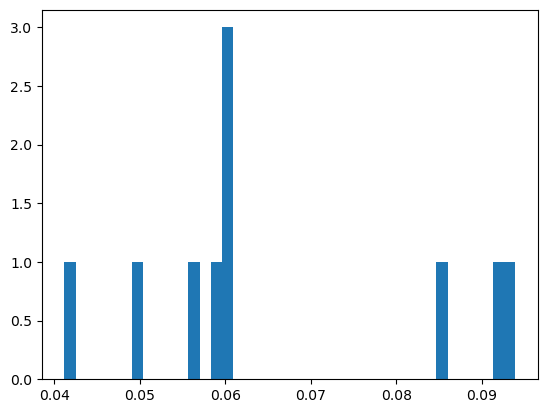

In [19]:
plt.hist(mc_scores, bins=40)

Well, this doesn't really look like anything yet. We should increase the number of iterations - which yields more robust results. Around 10,000 iterations is a good starting point. However, this takes a while, so we will just give it a try with 100 now. See for yourself how long it would take for a higher number of iterations.

In [13]:
n_runs = 100 # define the number of iterations

In [20]:
%%time
mc_scores_n = [mc_lca.score for _ in zip(mc_lca, range(n_runs))]

CPU times: user 3min 24s, sys: 3.38 s, total: 3min 28s
Wall time: 3min 31s


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  5.,  4.,  8., 11., 12.,
        12., 10.,  7.,  7.,  4.,  5.,  2.,  3.,  1.,  1.,  1.,  1.,  1.,
         2.]),
 array([-0.14143848, -0.13329705, -0.12515561, -0.11701418, -0.10887275,
        -0.10073132, -0.09258989, -0.08444845, -0.07630702, -0.06816559,
        -0.06002416, -0.05188273, -0.04374129, -0.03559986, -0.02745843,
        -0.019317  , -0.01117557, -0.00303413,  0.0051073 ,  0.01324873,
         0.02139016,  0.02953159,  0.03767303,  0.04581446,  0.05395589,
         0.06209732,  0.07023875,  0.07838019,  0.08652162,  0.09466305,
         0.10280448,  0.11094591,  0.11908735,  0.12722878,  0.13537021,
         0.14351164,  0.15165307,  0.15979451,  0.16793594,  0.17607737,
         0.1842188 ]),
 <BarContainer object of 40 artists>)

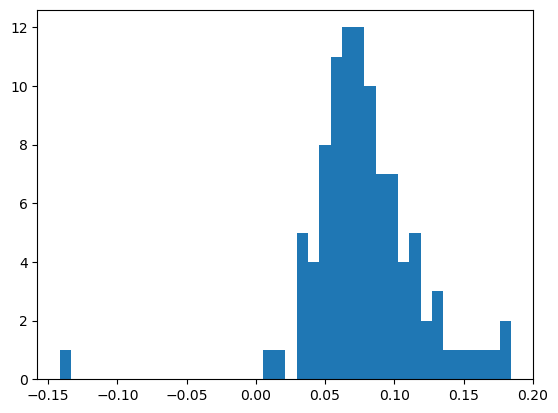

In [21]:
plt.hist(mc_scores_n, bins=40)

...there, much better! Now go for those 10,000 iterations! 🏎️